# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [3]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = '/Users/kmsmith5/Documents/Personal/SDC/Term1/Projects/Project2/traffic-signs-data/train.p'
testing_file = '/Users/kmsmith5/Documents/Personal/SDC/Term1/Projects/Project2/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
def shuffle(X,Y):
    indices = np.arange(0, len(X))
    np.random.shuffle(indices)
    return (X[indices], Y[indices])
def next_batch(X,Y,batch_size):
    Xs,Ys = shuffle(X,Y)
    return Xs[:batch_size], Ys[:batch_size]

In [7]:
X_train, y_train = shuffle(X_train, y_train)

In [6]:
### To start off let's do a basic data summary.
import numpy as np

# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# print(X_train[0].shape)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(np.unique(y_train)) 

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


0


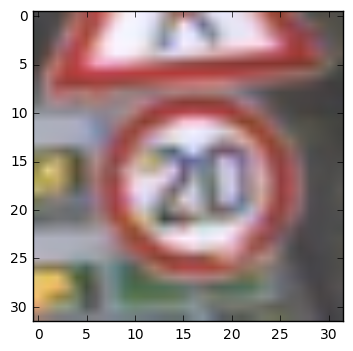

1


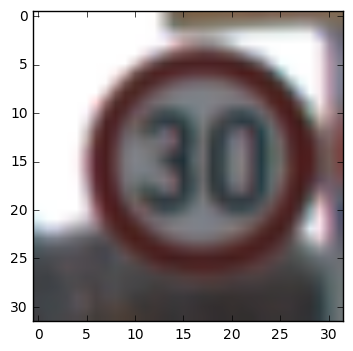

2


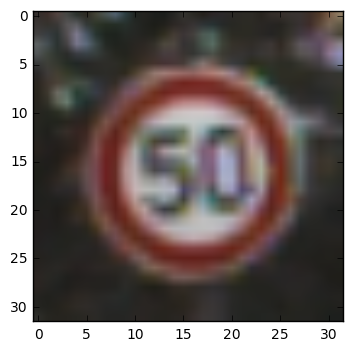

3


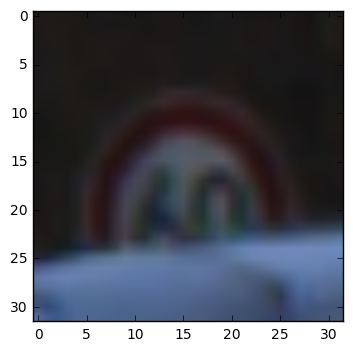

4


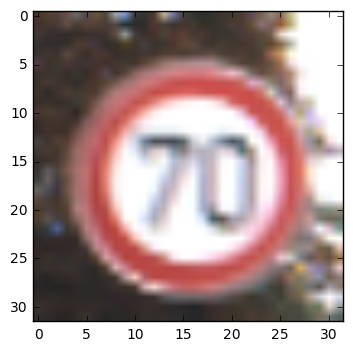

5


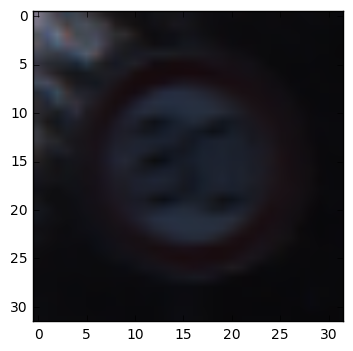

6


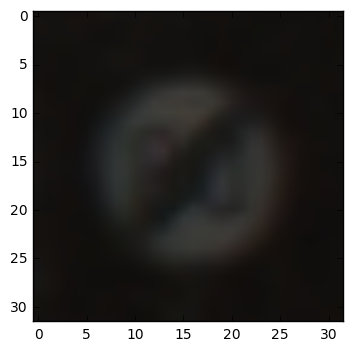

7


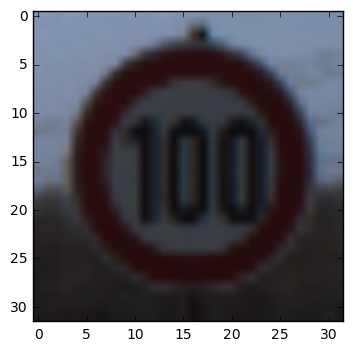

8


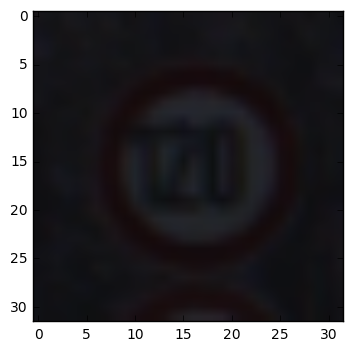

9


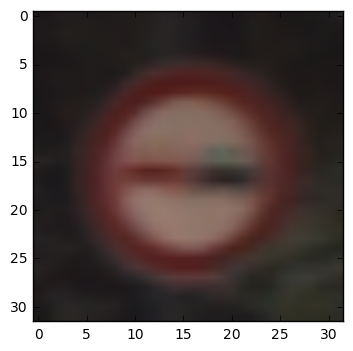

10


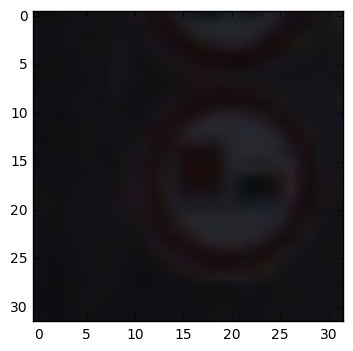

11


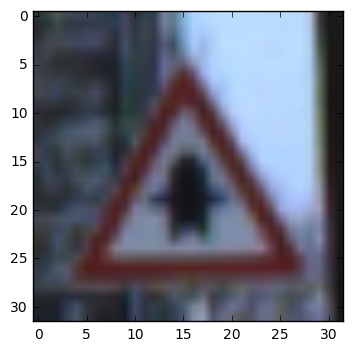

12


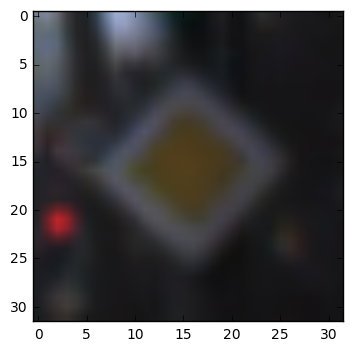

13


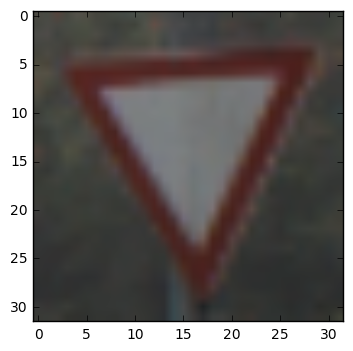

14


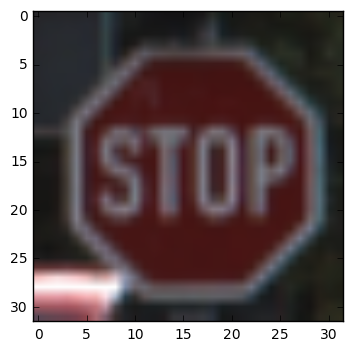

15


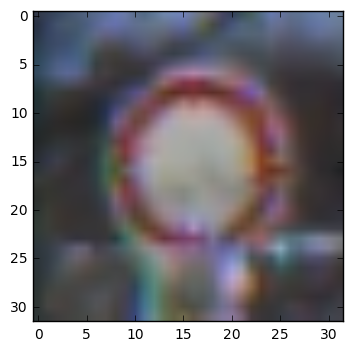

16


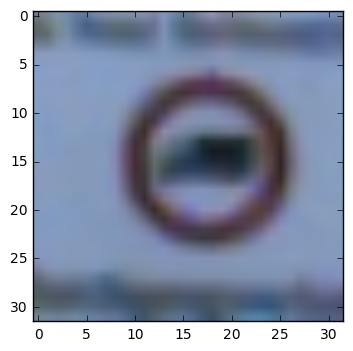

17


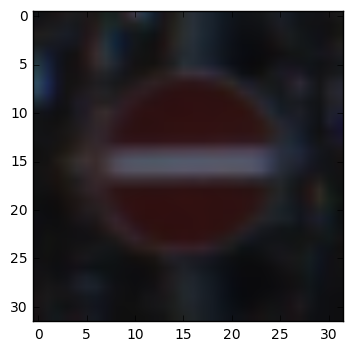

18


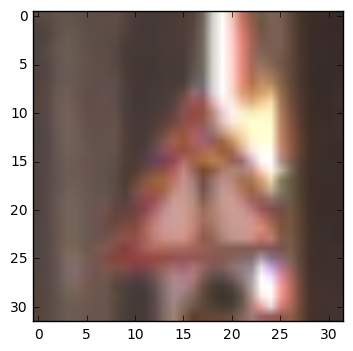

19


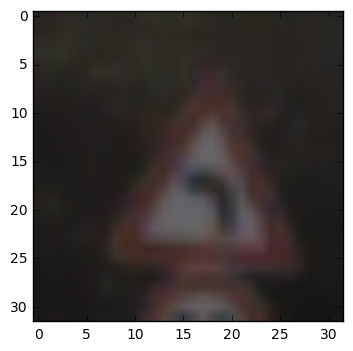

20


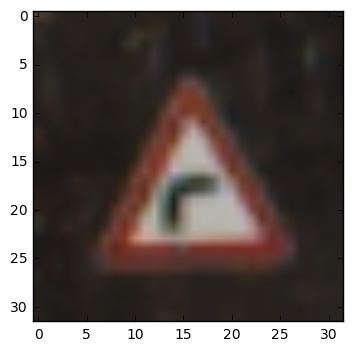

21


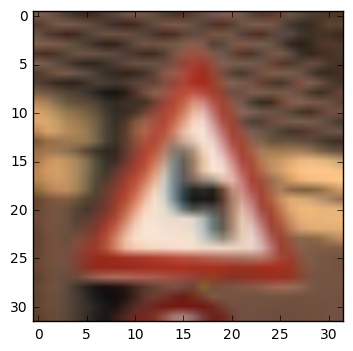

22


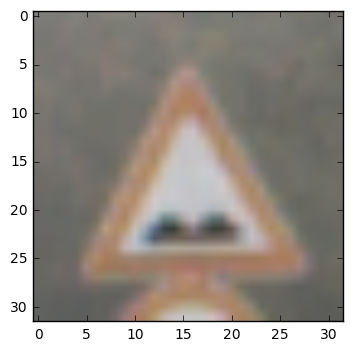

23


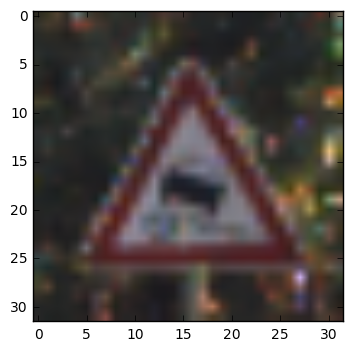

24


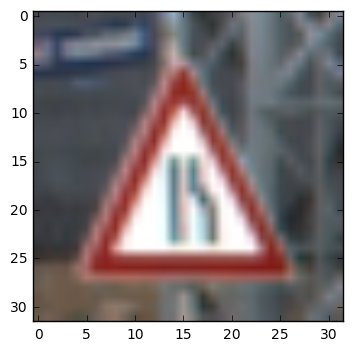

25


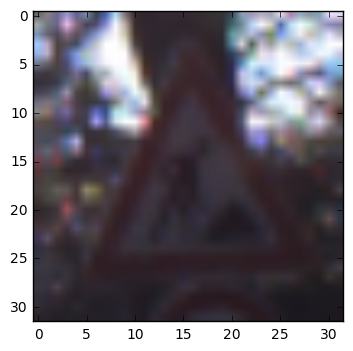

26


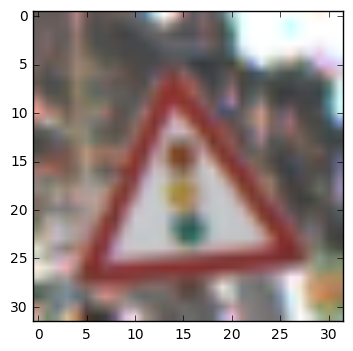

27


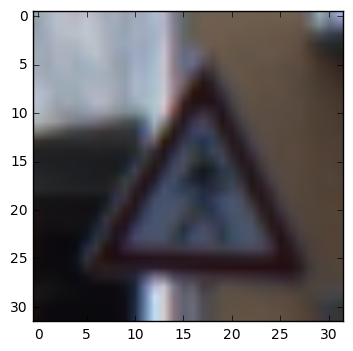

28


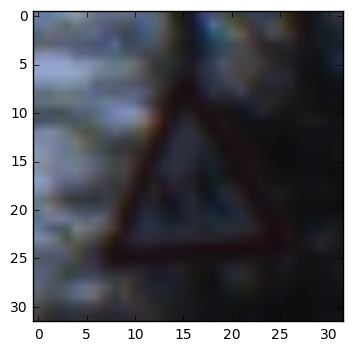

29


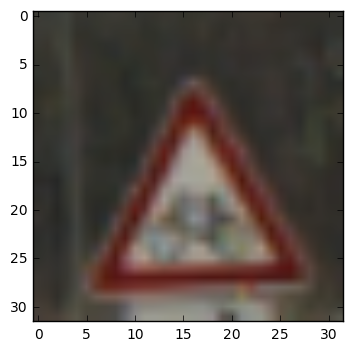

30


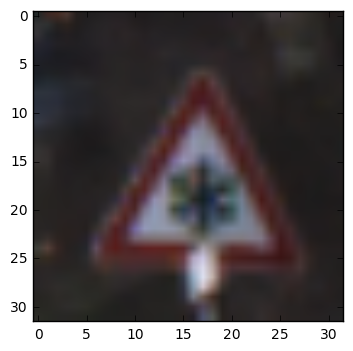

31


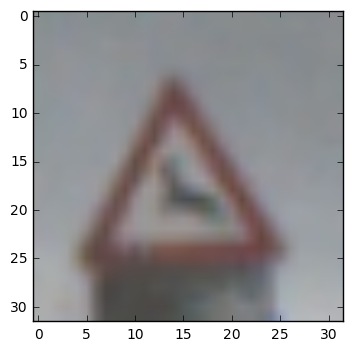

32


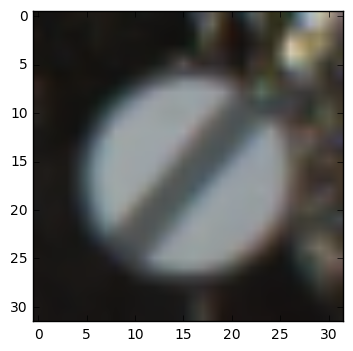

33


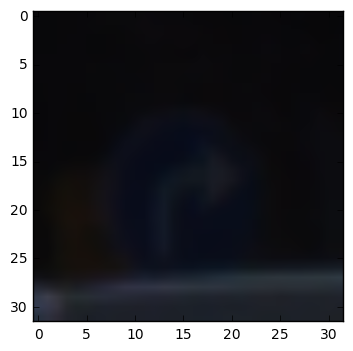

34


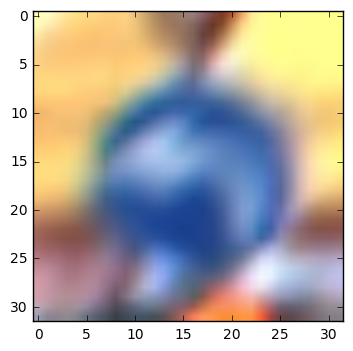

35


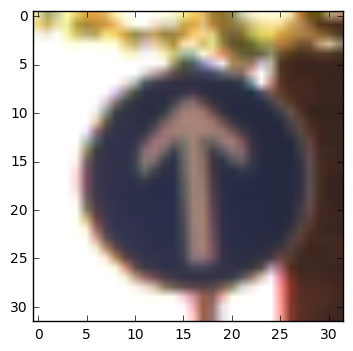

36


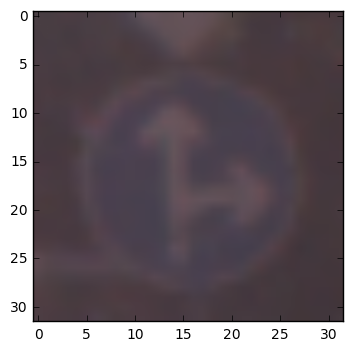

37


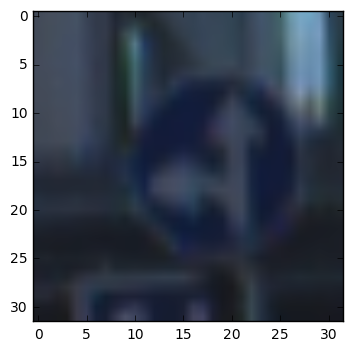

38


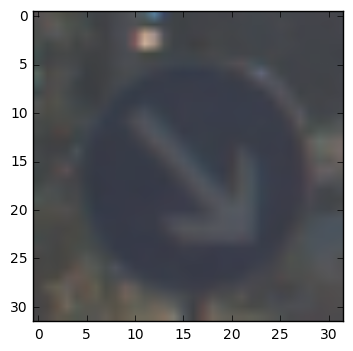

39


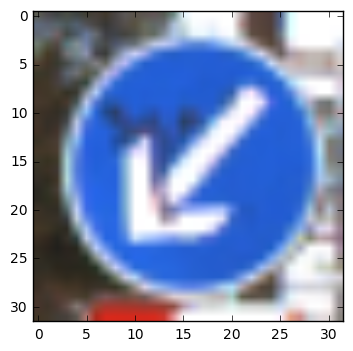

40


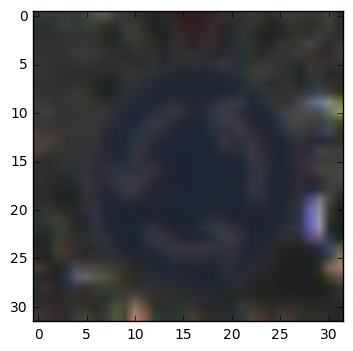

41


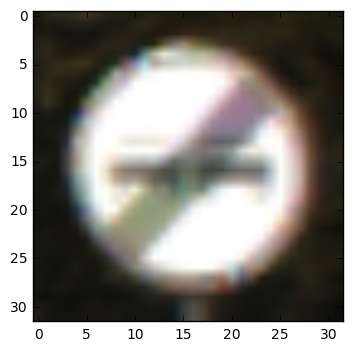

42


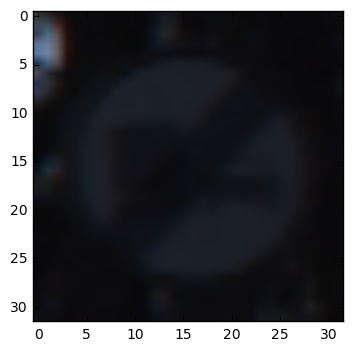

Done displaying images!


In [8]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# required to actually show graphics
%matplotlib inline 

# Import packages
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# For each unique label in the training data
labels = np.unique(y_train)
for lab in labels:
    
    # Get the first training image associated with each label
    matchingIndices = np.where(y_train == lab)
    
    # Print the label (for indexing labels)
    print(lab)
    
    # Plot the image.
    plt.imshow(X_train[matchingIndices[0][0]])
    plt.show()

print("Done displaying images!")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
import tensorflow as tf

### Preprocess the data here.
### Feel free to use as many code cells as needed.

"""
This function preprocesses the data (either training or test) 
by flattening the data
"""
def preprocess(X):

    # Scale image from 0 to +1 (image normalization)
    X = (X-128.0) / 128.0
    
    return X

def oneHot(y, n_classes):
    return np.eye(n_classes)[y]
    
# One-hot encode the labels.
y_train_p = oneHot(y_train, n_classes)
y_test_p  = oneHot(y_train, n_classes)

# Pre-process the training data
X_train_p = preprocess(X_train)
print("Pre-processed Training Data!")

# Pre-process the test data.
X_test_p = preprocess(X_test)
print("Pre-Processed Test Data!")

Pre-processed Training Data!
Pre-Processed Test Data!


In [11]:
print((X_train[0,0,0,0]-128)/128)
print(X_train_p[0,0,0,0])

print(y_train_p[0])




-0.46875
-0.46875
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


### Question 1 

_Describe the techniques used to preprocess the data._

I pre-processed the data by converting the full color RGB images to grayscale/intensity maps.  This was done to reduce the number of weights that need to be learned in the first convolution layer by a factor of 3.  Next, each intensity image was centered such that each image's mean intensity is centered at 128 (halfway between 0 and 255).  This produces a zero-mean distribution of input features which helps to accelerate the learning process.

In [12]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Training data (70%)
X_Train = X_train_p
Y_Train = y_train_p
print("Train Data = " + str(len(X_train_p)) + " elements.")
print("Test Data = " + str(len(X_test_p)) + " elements.")

# Define validation fraction
vFrac = 0.60

n = int(vFrac*len(X_test_p))
# Validation Data(20%)
X_Validation = X_test_p[:n,:,:,:]
Y_Validation = y_test_p[:n,:]

# Test Data (10%)
X_Test = X_test_p[n:,:,:,:]
Y_Test = y_test_p[n:,:]

totalCases = len(X_train_p) + len(X_test_p)
print("Training - %d%% => %d" % ((100.0* len(X_Train)) / float(totalCases), len(X_Train)))
print("Validation - %d%% => %d" % ((100.0* len(X_Validation)) / float(totalCases), len(X_Validation)))
print("Test - %d%% => %d" % ((100.0* len(X_Test)) / float(totalCases), len(X_Test)))


Train Data = 39209 elements.
Test Data = 12630 elements.
Training - 75% => 39209
Validation - 14% => 7578
Test - 9% => 5052


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

TODO

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [13]:
import time
import datetime
import math

def predict_finish_time(percentComplete, startTime):
    elapsedTime = time.time() - startTime
    rate = percentComplete / elapsedTime
    predictedRunTime = 1.0 / rate
    finish_time = predictedRunTime + startTime
    return finish_time

def estimated_finish_time(percentComplete, startTime):
    tf = predict_finish_time(percentComplete, startTime)
    return time.strftime("%a, %d %b %Y %H:%M:%S",time.gmtime(tf))

def time_remaining(percentComplete, startTime):
    tf = predict_finish_time(percentComplete, startTime)
    # print(tf)
    dt = tf -  time.time()
    # print("dt = " + str(dt))
    return dt

def hhmmss(dt):
    hour = math.floor(float(dt)/3600.0)
    # print(str(hour))
    minutes_decimal = (float(dt) - hour*3600.0)/60.0
    #print(str(minutes_decimal))
    minutes = math.floor(minutes_decimal)
    #print(str(minutes))
    seconds = math.floor(float(dt) - hour*3600.0 - minutes*60.0)
    #print(str(seconds))

    time = '%02d:%02d:%02d' % (int(hour),int(minutes),int(seconds))
    return time

def hhmmss_left(percentComplete, startTime):
    return hhmmss(time_remaining(percentComplete, startTime))



In [14]:
import sys

# Print iterations progress
def printProgress (iteration, total, prefix = '', suffix = '', decimals = 1, barLength = 100):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        barLength   - Optional  : character length of bar (Int)
    """
    formatStr = "{0:." + str(decimals) + "f}"
    percent = formatStr.format(100 * (iteration / float(total)))
    filledLength = int(round(barLength * iteration / float(total)))
    bar = '█' * filledLength + '-' * (barLength - filledLength)
    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percent, '%', suffix)),
    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

In [15]:
### Train your model here.
### Feel free to use as many code cells as needed.

# tf Graph input
x = tf.placeholder("float", [None, 32, 32, 3])
y = tf.placeholder("float", [None, n_classes])

In [42]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf



n_input = 32*32  # num pixels per image

# working config = [32 16 256 512]
test_config = [128, 64, 256, 512]
layer_depth = {
    'layer_1': 32,
    'layer_2': 64, # This seems to need to be 16?
    'layer_3': 60,
    'fully_connected': 1024
}

keep_prob = tf.placeholder(tf.float32)

# Store layers weight & bias
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 3, layer_depth['layer_1']])),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_depth['layer_1'], layer_depth['layer_2']])),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_depth['layer_2'], layer_depth['layer_3']])),
    'fully_connected': tf.Variable(tf.truncated_normal(
        # [1024*layer_depth['layer_3'], layer_depth['fully_connected']])),
        [64*layer_depth['layer_2'], layer_depth['fully_connected']])),
    'out': tf.Variable(tf.truncated_normal(
        [layer_depth['fully_connected'], n_classes]))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_depth['layer_3'])),
    'fully_connected': tf.Variable(tf.zeros(layer_depth['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x


def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

"""
For now, I'll run with a two layer CNN where each layer is comprised of 
convolution->max pooling->reLU->dropout.  The network is capped with a fully connected layer"""
def conv_net(x, weights, biases, Debug=False):
    
    # Layer 1 (with Max Pooling)
    conv1a = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1b = tf.nn.relu(conv1a)
    conv1c = maxpool2d(conv1b)
    # conv1d = tf.nn.dropout(conv1c, keep_prob)
    
    # Layer 2 (With Max Pooling)
    conv2a = conv2d(conv1c, weights['layer_2'], biases['layer_2'])
    conv2b = tf.nn.relu(conv2a)
    conv2c = maxpool2d(conv2b)
    # conv2_d = tf.nn.dropout(conv2c, keep_prob)
    
    # Layer 3
    # conv3a = conv2d(conv2_d, weights['layer_3'], biases['layer_3'])
    # conv3b = maxpool2d(conv3a)
    # conv3c = tf.nn.relu(conv3a)
    # conv3d = tf.nn.dropout(conv3c, keep_prob)
    
    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    
    newShape = [-1, weights['fully_connected'].get_shape().as_list()[0]]

    fc1a = tf.reshape(conv2c, newShape)
    
    fc1b = tf.add(
        tf.matmul(fc1a, weights['fully_connected']),
        biases['fully_connected'])
    
    # Use a ReLU for final activation
    fc1c = tf.nn.relu(fc1b)
    
    # Output Layer - class prediction
    out = tf.add(tf.matmul(fc1c, weights['out']), biases['out'])
    
    # Softmax the output
    out = tf.nn.softmax(out)
    
    if Debug:
        print('------ LAYER 1 ------- ')
        print("Pre-Convolution       = " + str(x.get_shape()))
        print("Post-Convolution = " + str(conv1a.get_shape()))
        print("Post-ReLU = " + str(conv1b.get_shape()))
        print("Post-Max Pooling = " + str(conv1c.get_shape()))
        
        # print("Post Dropout  = " + str(conv1d.get_shape()))
        print('------ LAYER 2 ------- ')
        print("Post-Convolution WX+b = " + str(conv2a.get_shape()))
        print("Post-ReLU = " + str(conv2b.get_shape()))
        print("Post-Max Pooling = " + str(conv2c.get_shape()))
        # print("Post Dropout  = " + str(conv2_d.get_shape()))
        # print('------ LAYER 3 ------- ')
        # print("Post-Convolution WX+b = " + str(conv3a.get_shape()))
        # print("Post-Max Pooling = " + str(conv3b.get_shape()))
        # print("Post-ReLU = " + str(conv3c.get_shape()))
        # print("Post Dropout  = " + str(conv3d.get_shape()))
        print("weights['fully_connected'].get_shape() = " + str(weights['fully_connected'].get_shape()))
        print("weights['fully_connected'].get_shape().as_list() = " + str(weights['fully_connected'].get_shape().as_list()))
        print("newShape = " + str(newShape))
        print('------ OUTPUT LAYER ------- ')
        print("Reshaped = " + str(fc1a.get_shape()))
        print("Post WX+b = " + str(fc1b.get_shape()))
        print("Post-ReLU = " + str(fc1c.get_shape()))
        print("Output  = " + str(out.get_shape()))

    return out


In [43]:
conv_net(x,weights,biases,Debug=True)
logits = conv_net(x, weights, biases)
y_conv=tf.nn.softmax(logits) 
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

------ LAYER 1 ------- 
Pre-Convolution       = (?, 32, 32, 3)
Post-Convolution = (?, 32, 32, 32)
Post-ReLU = (?, 32, 32, 32)
Post-Max Pooling = (?, 16, 16, 32)
------ LAYER 2 ------- 
Post-Convolution WX+b = (?, 16, 16, 64)
Post-ReLU = (?, 16, 16, 64)
Post-Max Pooling = (?, 8, 8, 64)
weights['fully_connected'].get_shape() = (4096, 1024)
weights['fully_connected'].get_shape().as_list() = [4096, 1024]
newShape = [-1, 4096]
------ OUTPUT LAYER ------- 
Reshaped = (?, 4096)
Post WX+b = (?, 1024)
Post-ReLU = (?, 1024)
Output  = (?, 43)


In [44]:
## Stewart's copy
learning_rate = 0.001 
batch_size = 250 
training_epochs = 15

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))

#cost = -tf.reduce_sum(y * tf.log(tf.clip_by_value(logits,1e-10,1.0)), reduction_indices=1)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#added by stewart
y_conv=logits # tf.nn.softmax(logits) 
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

nBatches = int(len(X_train_p)/batch_size)

# Initializing the variables
init = tf.initialize_all_variables()

In [ ]:
import matplotlib.pyplot as plt
Debug = False

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    print("Beginning training (%d batches)..." % (nBatches))
    cHist = []
    
    startTime = time.time()
    
    batchCtr = 1
    nTotal = float(nBatches*training_epochs)
    # Training cycle
    for epochs in range(training_epochs):
        print("-- Epoch %d -- " % (epochs))
        for i in range(nBatches):

            batch_x, batch_y = next_batch(X_Train, Y_Train, batch_size)
            # batch_x = X_Train[i*batch_size:(i+1)*batch_size-1,:,:,:]
            # batch_y = Y_Train[i*batch_size:(i+1)*batch_size-1]

            batchCtr += 1
            if Debug:
                print("batch_x.shape = " + str(batch_x.shape))
                print("batch_y.shape = " + str(batch_y.shape))

            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})

            # added by stewart
            train_accuracy = sess.run(accuracy, feed_dict={
                x: batch_x, y: batch_y,
                    keep_prob: 1.0})

            print("Batch %d : %f%%" % (i, train_accuracy))
            # print(hhmmss_left(float(batchCtr)/nTotal, startTime) + " | Accuracy = " + str(train_accuracy) + "%")

Beginning training (156 batches)...
-- Epoch 0 -- 
Batch 0 : 0.012000%
Batch 1 : 0.012000%
Batch 2 : 0.036000%
Batch 3 : 0.016000%
Batch 4 : 0.028000%
Batch 5 : 0.016000%
Batch 6 : 0.012000%
Batch 7 : 0.012000%
Batch 8 : 0.032000%
Batch 9 : 0.016000%
Batch 10 : 0.024000%
Batch 11 : 0.020000%
Batch 12 : 0.016000%
Batch 13 : 0.012000%


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.